# Binary Morphology

## Binarising Images

Utilising the code and thresholds from assignmnet 1.

In [ ]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['image.cmap'] = 'gray'

airplane = '5.1.11.tiff'
truck = '7.1.01.tiff'
airport = '5.3.02.tiff'
APC = '7.1.08.tiff'

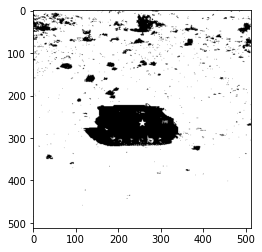

In [ ]:
def binarise(filePath, T):
  I = mpimg.imread(filePath)
  binI = (I >= T)
  plt.imshow(binI)

  return binI

# APC T = 100
APC_bin = binarise(APC, 100)


## 1.

### Defining windows

In [ ]:
SQUARE_3 = np.ones((3, 3))


CROSS_5 = np.zeros((5, 5))
CROSS_5[:, 2] = 1
CROSS_5[2, :] = 1

### Padding Function

In [ ]:
def pad(I, padding):
  iHeight, iWidth = I.shape

  padded = np.zeros((iHeight + padding * 2, iWidth + padding * 2))

  padded[padding:-padding, padding:-padding] = I
  # replicate the top and bottom rows
  padded[0:padding, padding:-padding] = I[0, :]
  padded[-padding:, padding:-padding] = I[-1, :]
  # replicate the left and right columns
  # print(padded[:, padding].reshape(-1,1).shape)
  padded[:, 0:padding] = padded[:, padding].reshape(-1, 1)
  padded[:, -padding:] = padded[:, -padding].reshape(-1, 1)

  return padded

In [ ]:
x = np.zeros((3, 3))
x[0:1, :] = [1,2,3]
x[1:2, :] = [4,5,6]

print(x)
print(x[-1, :])

[[1. 2. 3.]
 [4. 5. 6.]
 [0. 0. 0.]]
[0. 0. 0.]


### Dilate

In [ ]:
def dilate(I, B):

  iHeight, iWidth = I.shape
  bHeight, bWidth = B.shape

  padding = bHeight // 2
  result = np.zeros((iHeight, iWidth))

  padded = pad(I, padding)
  weight = B.sum()

  for y in range(padding, iHeight + padding):
    for x in range(padding, iWidth + padding):
      temp = (np.multiply(B, padded[y - padding: y + padding + 1, x - padding: x + padding + 1]).sum())
      if temp > 0:
        result[y - padding, x - padding] = 1
      else:
        result[y - padding, x - padding] = 0
      
  # plt.imshow(result)
  return result

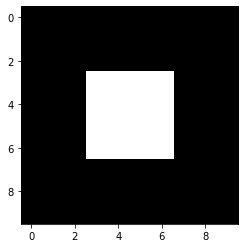

In [ ]:
test = np.zeros((10,10))
test[3:7, 3:7] = 1
plt.imshow(test)

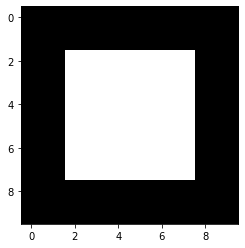

In [ ]:
test_dil = dilate(test, SQUARE_3)
plt.imshow(test_dil)

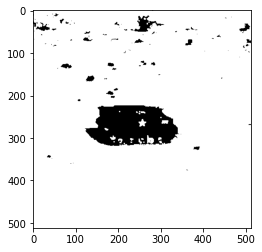

In [ ]:
APC_dil_sq = dilate(APC_bin, SQUARE_3)
plt.imshow(APC_dil_sq)

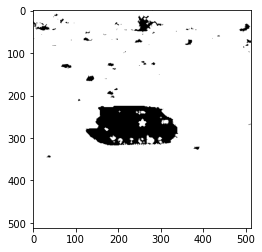

In [ ]:
APC_dil_cr = dilate(APC_bin, CROSS_5)
plt.imshow(APC_dil_cr)

### Erode

In [ ]:
def erode(I, B):

  iHeight, iWidth = I.shape
  bHeight, bWidth = B.shape

  padding = bHeight // 2
  result = np.zeros((iHeight, iWidth))

  padded = pad(I, padding)
  weight = B.sum()

  for y in range(padding, iHeight + padding):
    for x in range(padding, iWidth + padding):
      temp = (np.multiply(B, padded[y - padding: y + padding + 1, x - padding: x + padding + 1]).sum()) / weight
      if temp == 1.0:
        result[y - padding, x - padding] = 1
      else:
        result[y - padding, x - padding] = 0
      
  # plt.imshow(result)
  return result

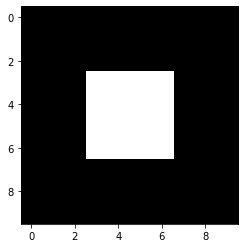

In [ ]:
test = np.zeros((10,10))
test[3:7, 3:7] = 1
plt.imshow(test)

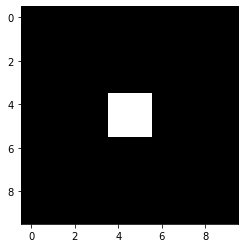

In [ ]:
test_er = erode(test, SQUARE_3)
plt.imshow(test_er)

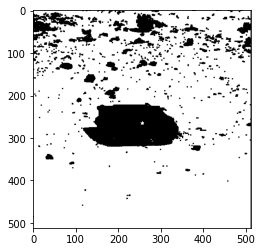

In [ ]:
APC_er_sq = erode(APC_bin, SQUARE_3)
plt.imshow(APC_er_sq)

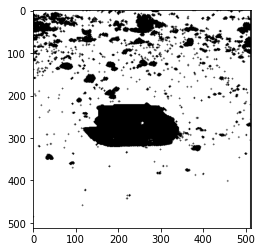

In [ ]:
APC_er_cr = erode(APC_bin, CROSS_5)
plt.imshow(APC_er_cr)

### Median

In [ ]:
def median(I, B):

  iHeight, iWidth = I.shape
  bHeight, bWidth = B.shape

  padding = bHeight // 2
  result = np.zeros((iHeight, iWidth))

  padded = pad(I, padding)
  weight = B.sum()

  for y in range(padding, iHeight + padding):
    for x in range(padding, iWidth + padding):
      temp = (np.multiply(B, padded[y - padding: y + padding + 1, x - padding: x + padding + 1]).sum()) / weight
      if temp >= 0.5:
        result[y - padding, x - padding] = 1
      else:
        result[y - padding, x - padding] = 0
      
  # plt.imshow(result)
  return result

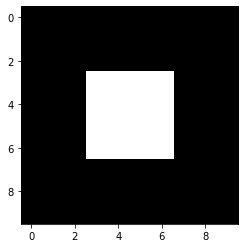

In [ ]:
test = np.zeros((10,10))
test[3:7, 3:7] = 1
plt.imshow(test)

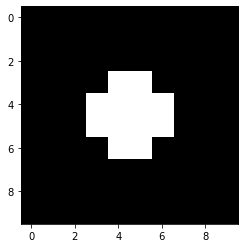

In [ ]:
test_md = median(test, SQUARE_3)
plt.imshow(test_md)

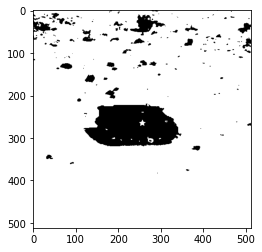

In [ ]:
APC_md_sq = median(APC_bin, SQUARE_3)
plt.imshow(APC_md_sq)

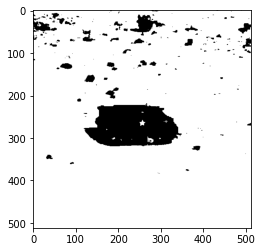

In [ ]:
APC_md_cr = median(APC_bin, CROSS_5)
plt.imshow(APC_md_cr)

## 2.

### Comparing dilate and erode

Since the last plot is all black, this proves that the difference between the direct result and the complement path is zero, thus proving duality.


<Figure size 432x288 with 0 Axes>

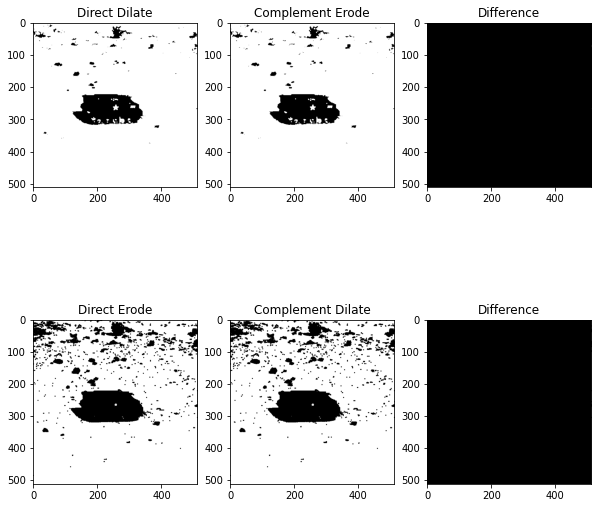

In [ ]:
def duality(I):
  I_dil = dilate(I, SQUARE_3)

  not_I = 1 - I
  not_I_er = erode(not_I, SQUARE_3)
  not_not_I_er = 1 - not_I_er

  difference1 = not_not_I_er - I_dil

  plt.figure()
  fig, axs = plt.subplots(2, 3, figsize=(10, 10))
  axs[0, 0].imshow(I_dil)
  axs[0, 1].imshow(not_not_I_er)
  axs[0, 2].imshow(difference1)

  axs[0, 0].set_title("Direct Dilate")
  axs[0, 1].set_title("Complement Erode")
  axs[0, 2].set_title("Difference")

  I_er = erode(I, SQUARE_3)

  not_I_dil = dilate(not_I, SQUARE_3)
  not_not_I_dil = 1 - not_I_dil

  difference2 = not_not_I_dil - I_er

  axs[1, 0].imshow(I_er)
  axs[1, 1].imshow(not_not_I_dil)
  axs[1, 2].imshow(difference2)

  axs[1, 0].set_title("Direct Erode")
  axs[1, 1].set_title("Complement Dilate")
  axs[1, 2].set_title("Difference")
  

duality(APC_bin)
print("Since the last plot is all black, this proves that the difference between the direct result and the complement path is zero, thus proving duality.")


### Median

Since the last plot is all black, this proves that the difference between the direct result and the complement path is zero, thus proving duality.


<Figure size 432x288 with 0 Axes>

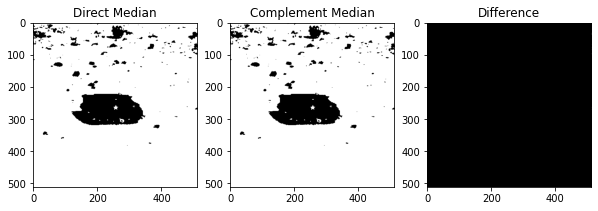

In [ ]:
def medianDuality(I):
  I_md = median(I, SQUARE_3)

  not_I = 1 - I
  not_I_md = median(not_I, SQUARE_3)
  not_not_I_md = 1 - not_I_md

  difference = not_not_I_md - I_md

  plt.figure()
  fig, axs = plt.subplots(1, 3, figsize=(10, 30))
  axs[0].imshow(I_md)
  axs[1].imshow(not_not_I_md)
  axs[2].imshow(difference)

  axs[0].set_title("Direct Median")
  axs[1].set_title("Complement Median")
  axs[2].set_title("Difference")

  

medianDuality(APC_bin)
print("Since the last plot is all black, this proves that the difference between the direct result and the complement path is zero, thus proving duality.")


## 3.

In [ ]:
def open(I, B):
  return dilate(erode(I, B), B)

In [ ]:
def close(I, B):
  return erode(dilate(I, B), B)

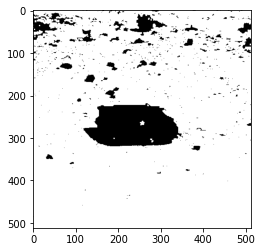

In [ ]:
plt.imshow(open(APC_bin, SQUARE_3))

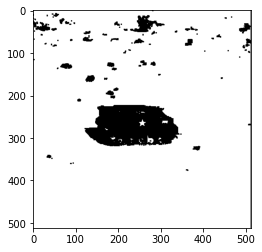

In [ ]:
plt.imshow(close(APC_bin, SQUARE_3))

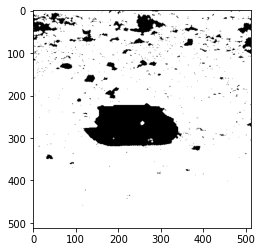

In [ ]:
plt.imshow(open(APC_bin, CROSS_5))

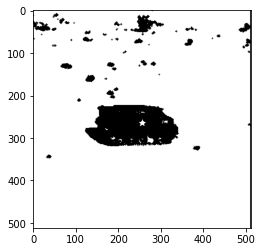

In [ ]:
plt.imshow(close(APC_bin, CROSS_5))

## 4.

In [ ]:
def open_clos(I, B):
  return open(close(I, B), B)

In [ ]:
def clos_open(I, B):
  return close(open(I, B), B)

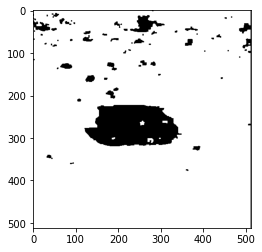

In [ ]:
plt.imshow(open_clos(APC_bin, SQUARE_3))

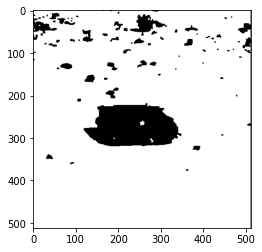

In [ ]:
plt.imshow(clos_open(APC_bin, SQUARE_3))

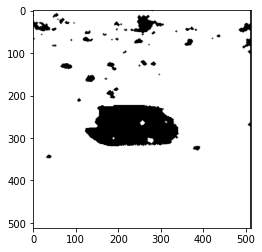

In [ ]:
plt.imshow(open_clos(APC_bin, CROSS_5))

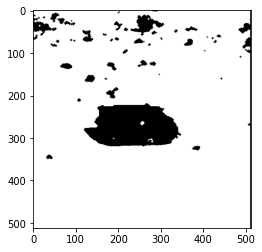

In [ ]:
plt.imshow(clos_open(APC_bin, CROSS_5))

## 5.

### Connected Components

In [ ]:
def connectedComponents(I):
  R = np.zeros(I.shape)
  k = 1

  top = 0
  left = 0
  background = 1

  blobSizes = {}

  for i in range(I.shape[0]):
    for j in range(I.shape[1]):

      if i - 1 < 0 and j - 1 < 0:
        top = background
        left = background
      elif i - 1 < 0:
        top = background
        left = I[i, j - 1]
      elif j - 1 < 0:
        top = I[i - 1, j]
        left = background
      else:
        top = I[i - 1, j]
        left = I[i, j - 1]

      if I[i, j] == 0:
        if left == 1 and top == 1:
          R[i, j] = k
          k = k + 1
          blobSizes[R[i, j]] = 1
        elif left == 1 and top == 0:
          R[i, j] = R[i - 1, j]
          blobSizes[R[i, j]] += 1
        elif left == 0 and top == 1:
          R[i, j] = R[i, j - 1]
          blobSizes[R[i, j]] += 1
        elif left == 0 and top == 0:
          R[i, j] = min(R[i, j - 1], R[i - 1, j])
          blobSizes[R[i, j]] += 1

          R[R == max(R[i, j - 1], R[i - 1, j])] = min(R[i, j - 1], R[i - 1, j])


  
  # blobs = (R > 0)
  blobs = (R <= 0)
  # plt.imshow(R)

  biggestBlob = max(blobSizes, key=blobSizes.get)
  clean = R == biggestBlob
  pixels = np.count_nonzero(clean)

  return R, clean, pixels

Pixels in object of interest


Text(0.5, 1.0, 'Clos-open:17007')

<Figure size 432x288 with 0 Axes>

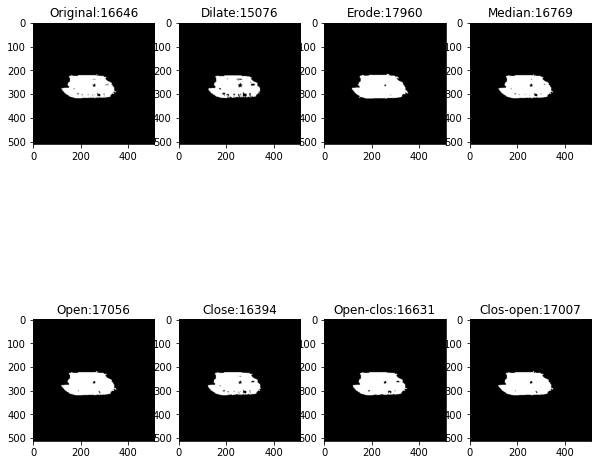

In [ ]:
print("Pixels in object of interest")


plt.figure()
fig, axs = plt.subplots(2, 4, figsize=(10, 10))

_, APC_OG, APC_OG_pix  = connectedComponents(APC_bin)
_, APC_dil, APC_dil_pix = connectedComponents(APC_dil_sq)
_, APC_er, APC_er_pix = connectedComponents(APC_er_sq)
_, APC_md, APC_md_pix = connectedComponents(APC_md_sq)
_, APC_op, APC_op_pix = connectedComponents(open(APC_bin, SQUARE_3))
_, APC_cl, APC_cl_pix = connectedComponents(close(APC_bin, SQUARE_3))
_, APC_op_cl, APC_op_cl_pix = connectedComponents(open_clos(APC_bin, SQUARE_3))
_, APC_cl_op, APC_cl_op_pix = connectedComponents(clos_open(APC_bin, SQUARE_3))



axs[0, 0].imshow(APC_OG)
axs[0, 1].imshow(APC_dil)
axs[0, 2].imshow(APC_er)
axs[0, 3].imshow(APC_md)


axs[0, 0].set_title("Original:" + str(APC_OG_pix))
axs[0, 1].set_title("Dilate:" + str(APC_dil_pix))
axs[0, 2].set_title("Erode:" + str(APC_er_pix))
axs[0, 3].set_title("Median:" + str(APC_md_pix))

axs[1, 0].imshow(APC_op)
axs[1, 1].imshow(APC_cl)
axs[1, 2].imshow(APC_op_cl)
axs[1, 3].imshow(APC_cl_op)


axs[1, 0].set_title("Open:" + str(APC_op_pix))
axs[1, 1].set_title("Close:" + str(APC_cl_pix))
axs[1, 2].set_title("Open-clos:" + str(APC_op_cl_pix))
axs[1, 3].set_title("Clos-open:" + str(APC_cl_op_pix))



# Gray Scale Point Operations

The image used for this question was the [Fire in Space](https://apod.nasa.gov/apod/ap210810.html) image, and can also be downloaded from [here](https://drive.google.com/file/d/1tnHFZxvakNkh1yBXlAoi_UMbvcHGvKRC/view?usp=sharing).

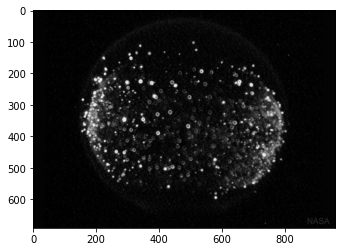

In [ ]:
import cv2

NASAImg = cv2.imread('SpaceFlame_nasa_960.jpg', 0)

# reduce pixel range for experimental purposes
Imin, Imax = np.amin(NASAImg), np.amax(NASAImg)
pmin, pmax = 30, 225
# pmin, pmax = 100, 120
NASAImg = np.multiply(NASAImg - Imin, (pmax - pmin)/(Imax - Imin)) + pmin
NASAImg = NASAImg.astype(int)
cv2.imwrite('NASA_img.jpg', NASAImg)

plt.imshow(NASAImg)

## Histogram

In [ ]:
def computeHistogram(I):
  frequencies = np.zeros(256)

  for i in range(256):
    frequencies[i] = np.count_nonzero(I == i)
  
  x_axis = np.arange(256)
  ax = plt.bar(x_axis, frequencies)
  plt.show(ax)

  return frequencies

## 1. Linear Point Operations

In [ ]:
def linearPointOp(I, P, L):
  J = P * I + L
  J = J.astype(int)
  J = np.clip(J, 0, 255)
  return J

### (a)

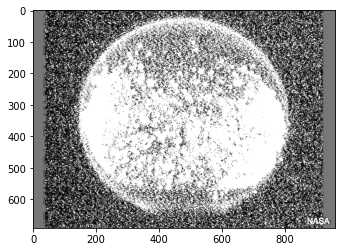

In [ ]:
NASAImg_2_1a = linearPointOp(NASAImg, 7, 0)
plt.imshow(NASAImg_2_1a)

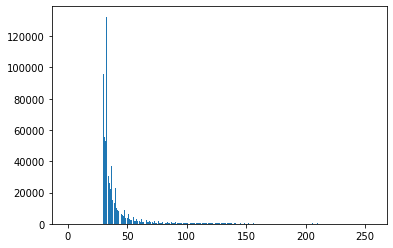

In [ ]:
temp = computeHistogram(NASAImg)

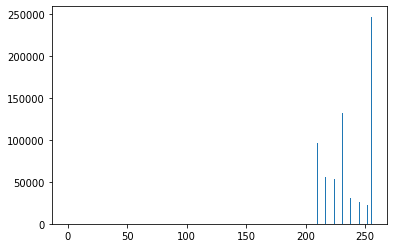

In [ ]:
temp = computeHistogram(NASAImg_2_1a)

As expected, we can see that the colours in the image were scaled up since all the bars moved to the higher end. The large frequency towards the end is due to the fact that many pixel values exceed 255 and thus got clipped to become 255.

### (b)

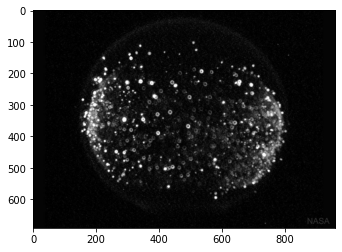

In [ ]:
NASAImg_2_1b = linearPointOp(NASAImg, 1, 50)
plt.imshow(NASAImg_2_1b)

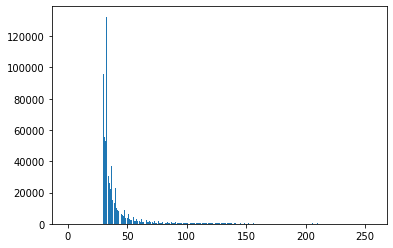

In [ ]:
temp = computeHistogram(NASAImg)

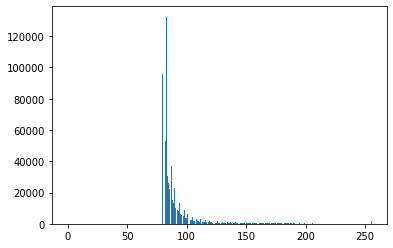

In [ ]:
temp = computeHistogram(NASAImg_2_1b)

From the histogram plots, we can clearly see that setting L > 0 shifted all the colour values to the right as expected.

### (c)

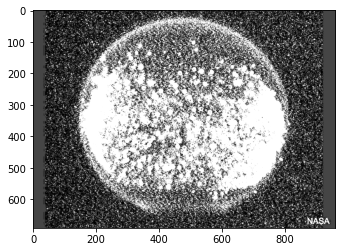

In [ ]:
NASAImg_2_1c = linearPointOp(NASAImg, 5, 50)
plt.imshow(NASAImg_2_1c)

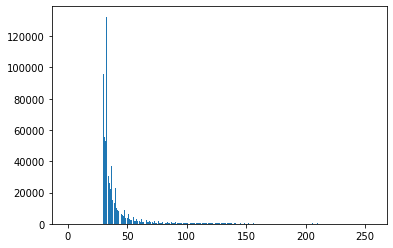

In [ ]:
temp = computeHistogram(NASAImg)

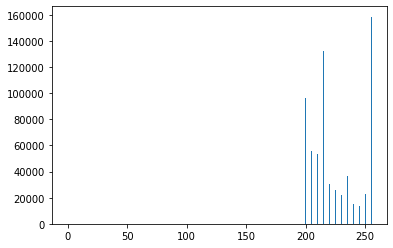

In [ ]:
temp = computeHistogram(NASAImg_2_1c)

The histograms prove that when P is not 1 and L is not 0, the pixel values get both scaled and offset.

## 2. Full Scale Contast Stretch

In [ ]:
def FSCS(I):
  A, B = np.amin(I), np.amax(I)

  K = 256
  P = (K - 1) / (B - A)
  L = -1 * A * P
  output = linearPointOp(I, P, L)
  return output

imgFSCS = FSCS(NASAImg)
print("Min and max pixel values in the original image:\n", np.amin(NASAImg), np.amax(NASAImg))
print("Min and max pixel values in the contrast-stretched image:\n", np.amin(imgFSCS), np.amax(imgFSCS))


Min and max pixel values in the original image:
 30 225
Min and max pixel values in the contrast-stretched image:
 0 255


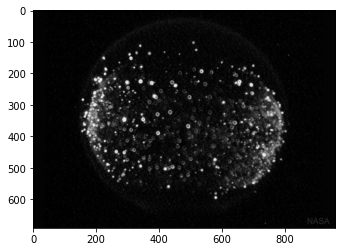

In [ ]:
plt.imshow(NASAImg)

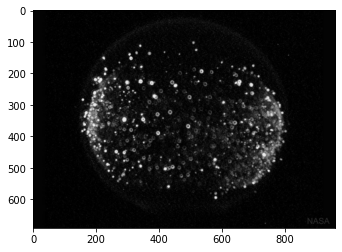

In [ ]:
plt.imshow(imgFSCS)

Original Histogram


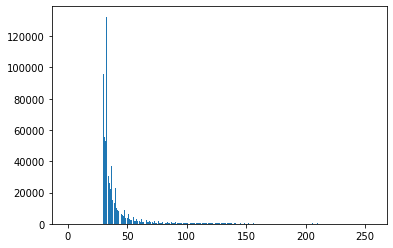

In [ ]:
print("Original Histogram")
temp = computeHistogram(NASAImg)

FSCS Histogram


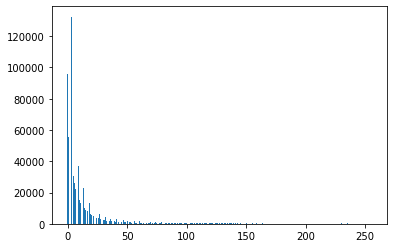

In [ ]:
print("FSCS Histogram")
temp = computeHistogram(imgFSCS)

From the histogram it is evident that the range of intensities were stetched to span 0-255, as evident by the bars moving towards the left.

## 3. Log Range Compression

In [ ]:
def logRangeCompression(I):
  J = np.log(1 + I)
  output = FSCS(J)
  return output

imgLRC = logRangeCompression(NASAImg)

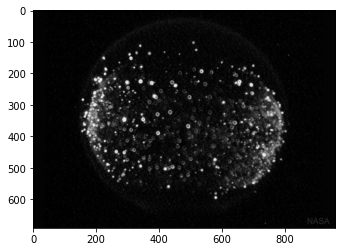

In [ ]:
plt.imshow(NASAImg)

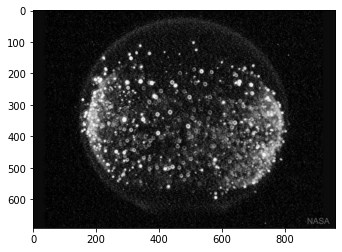

In [ ]:
plt.imshow(imgLRC)

Original Histogram


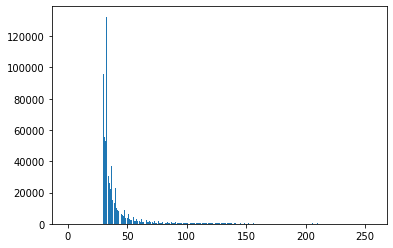

In [ ]:
print("Original Histogram")
temp = computeHistogram(NASAImg)

Log Range Compression Histogram


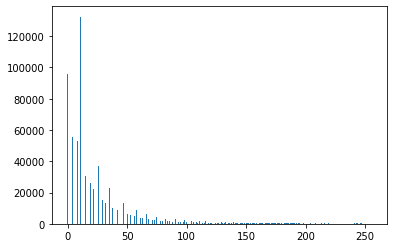

In [ ]:
print("Log Range Compression Histogram")
temp = computeHistogram(imgLRC)

Log compression worked as expected because after running it we can see a lot more stars/white spots in the image which were otherwise invisible in the original image.

## 4. Gamma Correction

In [ ]:
def gammaCorrection(I, gamma):
  J = np.power(I, gamma)
  J = J.astype(int)
  output = np.clip(J, 0, 255)
  return output

imgGamma = gammaCorrection(NASAImg, 1.4)


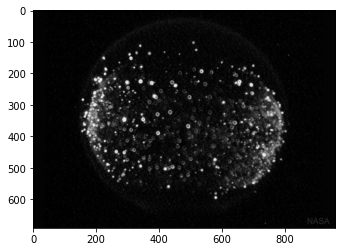

In [ ]:
plt.imshow(NASAImg)

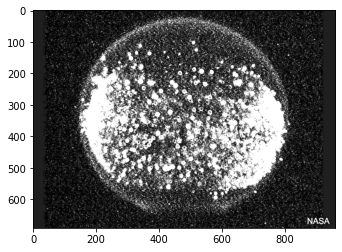

In [ ]:
plt.imshow(imgGamma)

Original Histogram


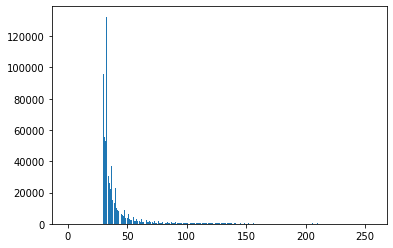

In [ ]:
print("Original Histogram")
temp = computeHistogram(NASAImg)

Gamma Correction Histogram


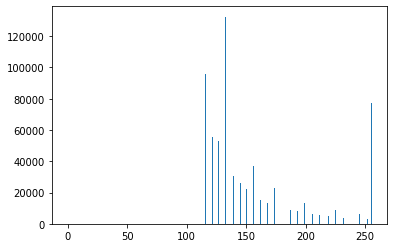

In [ ]:
print("Gamma Correction Histogram")
temp = computeHistogram(imgGamma)

Gamma correction made the entire image rather brighter which is as expected because we scaled all the intensities up by a certain amount.

## 5. Histogram Flattening

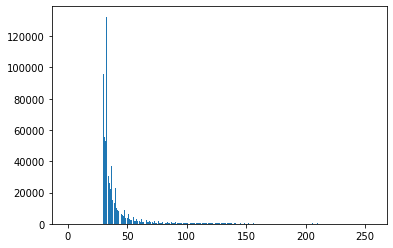

In [ ]:
def histogramFlattening(I, H):
  M, N = I.shape
  p = H / (M * N)
  P = np.zeros(256)
  P[0] = p[0]
  for i in range(1, 256):
    P[i] = P[i - 1] + p[i]
  
  J = np.zeros((M, N))
  for i in range(0, 256):
    indices = np.where(I == i)
    J[indices] = P[i]

  output = FSCS(J)
  
  return output

frequencies = computeHistogram(NASAImg)
imgFlat = histogramFlattening(NASAImg, frequencies)

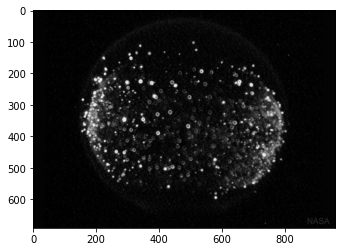

In [ ]:
plt.imshow(NASAImg)

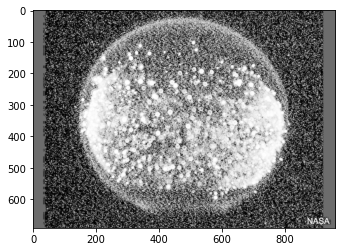

In [ ]:
plt.imshow(imgFlat)

Original Histogram


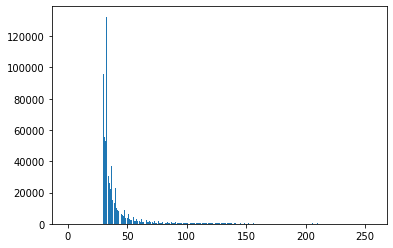

In [ ]:
print("Original Histogram")
frequencies = computeHistogram(NASAImg)

Flatenned Histogram


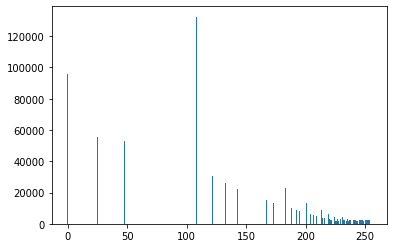

In [ ]:
print("Flatenned Histogram")
temp = computeHistogram(imgFlat)

Histogram flattening distributed the intensities over the image more evenly and as a result the image looks a lot whiter than the original because the original barely had any white in it, but after evenly distributing it does.

# Image Zooming

## Nearest Neighbour

In [ ]:
import math

def nearestNeighbour(I, zoomFactor):
  h, w = I.shape
  hNew, wNew = math.ceil(h * zoomFactor), math.ceil(w * zoomFactor)

  zoomed = np.zeros((hNew, wNew))
  
  for i in range(hNew):
    for j in range(wNew):
      # print(i // zoomFactor, j // zoomFactor)
      zoomed[i, j] = I[int(i // zoomFactor), int(j // zoomFactor)]

  return zoomed

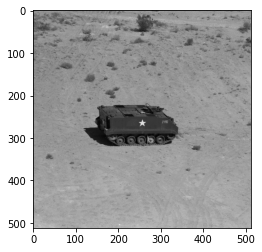

In [ ]:
plt.imshow(mpimg.imread(APC))

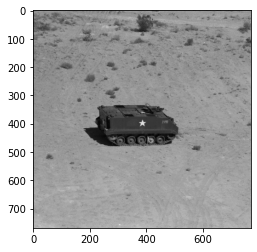

In [ ]:
APC_zoomed = nearestNeighbour(mpimg.imread(APC), 1.5)
plt.imshow(APC_zoomed)

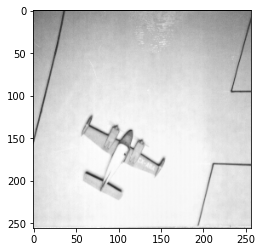

In [ ]:
plt.imshow(mpimg.imread(airplane))

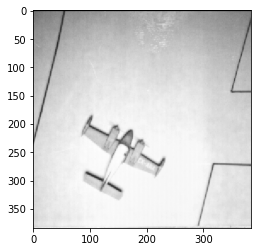

In [ ]:
airplane_zoomed = nearestNeighbour(mpimg.imread(airplane), 1.5)
plt.imshow(airplane_zoomed)

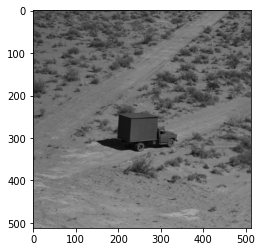

In [ ]:
plt.imshow(mpimg.imread(truck))

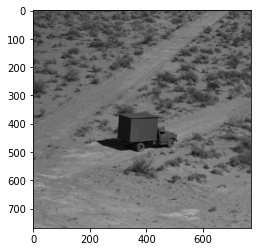

In [ ]:
truck_zoomed = nearestNeighbour(mpimg.imread(truck), 1.5)
plt.imshow(truck_zoomed)

## Bilinear Interpolation

In [ ]:
import math

def bilinearInterpolation(I, zoomFactor):
  h, w = I.shape
  hNew, wNew = math.ceil(h * zoomFactor), math.ceil(w * zoomFactor)

  zoomed = np.zeros((hNew, wNew))

  for i in range(hNew):
    for j in range(wNew):
      x, y = (i / zoomFactor), (j / zoomFactor)

      # assigning nearest neighbours while dealing with out of bound indices
      i0, j0 = min(h - 1, math.floor(x)), min(w - 1, math.floor(y))
      i1, j1 = min(h - 1, math.floor(x)), min(w - 1, math.ceil(y))
      i2, j2 = min(h - 1, math.ceil(x)), min(w - 1, math.floor(y))
      i3, j3 = min(h - 1, math.ceil(x)), min(w - 1, math.ceil(y))

      # M * coefficients = b
      b = np.array([I[i0, j0], I[i1, j1], I[i2, j2], I[i3, j3]])

      M = np.array([
                    [1, i0, j0, i0 * j0],
                    [1, i1, j1, i1 * j1],
                    [1, i2, j2, i2 * j2],
                    [1, i3, j3, i3 * j3]])
      
      # using np.linalg.pinv() over np.linalg.solve() to deal with singular matrices
      coefficients = np.matmul(np.linalg.pinv(M), b)
      A, B, C, D = coefficients
      zoomed[i, j] = int(A + B * (i / zoomFactor) + C * (j / zoomFactor) + D * (i / zoomFactor) * (j / zoomFactor))
  
  zoomed = np.clip(zoomed, 0, 255)
  return zoomed

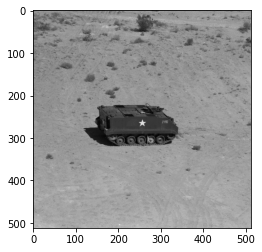

In [ ]:
plt.imshow(mpimg.imread(APC))

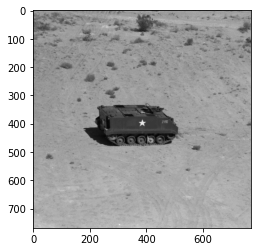

In [ ]:
APC_zoomed = bilinearInterpolation(mpimg.imread(APC), 1.5)
plt.imshow(APC_zoomed)

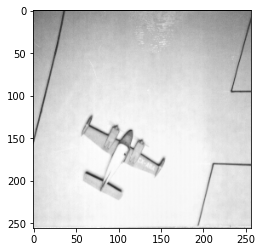

In [ ]:
plt.imshow(mpimg.imread(airplane))

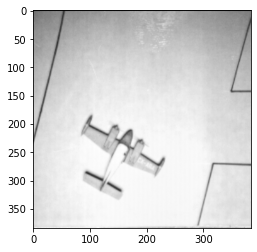

In [ ]:
airplane_zoomed = bilinearInterpolation(mpimg.imread(airplane), 1.5)
plt.imshow(airplane_zoomed)

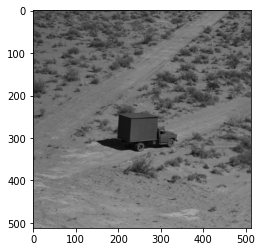

In [ ]:
plt.imshow(mpimg.imread(truck))

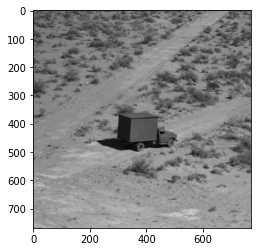

In [ ]:
truck_zoomed = bilinearInterpolation(mpimg.imread(truck), 1.5)
plt.imshow(truck_zoomed)

Both methods have a time complexity of $O(n^2)$ since we use two for loops to iterate through each pixel. However, bilinear interpolation is more computationally expensive as compared to the nearest neighbour method because we need to solve a set of four equations for every single pixel, which takes up lot of time.

Quality-wise, I'd expect biliniear interpolation to give better results since it's taking the average of surrounding pixels to interpolate a value for the pixels in between, but due to small size of the input images used here, we don't notice much of a difference between the two methods.